# Iris dataset
---
#### Name: 劉耀文 (Yao-Wen Liu)
#### Student ID: 0716236
---

## 1. Data Input
### Import libraries and read dataset from file
* Use read_csv() in Pandas to read the dataset from file.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy import stats
%matplotlib inline

#read dataset
dataset = pd.read_csv("iris.data", sep=",", header=None)
feature_list=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']

## 2. Data Visualization
### Show the data distribution by value frequency of every feature.
* Use Dataframe.mean() and Dataframe.std() in Pandas to find the average and standard deviation of each feature.
* Use plt.hist() to draw the value frequency fugure.

			Average		Std
sepal length in cm	5.843		0.828
sepal width in cm	3.054		0.434
petal length in cm	3.759		1.764
petal width in cm	1.199		0.763




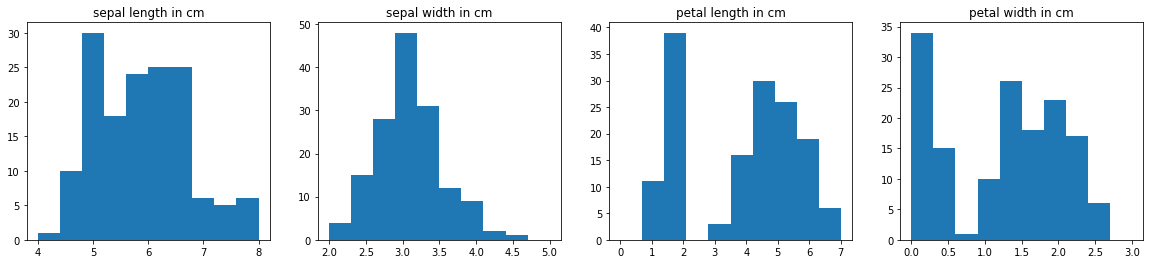

In [24]:
print("\t\t\tAverage\t\tStd")
print("sepal length in cm\t" + str(round(dataset[0].mean(),3)) + "\t\t" + str(round(dataset[0].std(),3)))
print("sepal width in cm\t" + str(round(dataset[1].mean(),3)) + "\t\t" + str(round(dataset[1].std(),3)))
print("petal length in cm\t" + str(round(dataset[2].mean(),3)) + "\t\t" + str(round(dataset[2].std(),3)))
print("petal width in cm\t" + str(round(dataset[3].mean(),3)) + "\t\t" + str(round(dataset[3].std(),3)))
print("\n")

plt.figure(figsize=(20, 4))
for i in range(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(dataset[i], bins=10, range=[round(dataset[i].min()-0.5), round(dataset[i].max()+0.5)])
    plt.title(feature_list[i])
plt.show()

### Split data based on their labels (targets) and show the data distribution of each feature.
#### Iris-setosa
* Use Dataframe.mean() and Dataframe.std() in Pandas to find the average and standard deviation of each feature.
* Use plt.hist() to draw the value frequency fugure.

			Average		Std
sepal length in cm	5.006		0.352
sepal width in cm	3.418		0.381
petal length in cm	1.464		0.174
petal width in cm	0.244		0.107




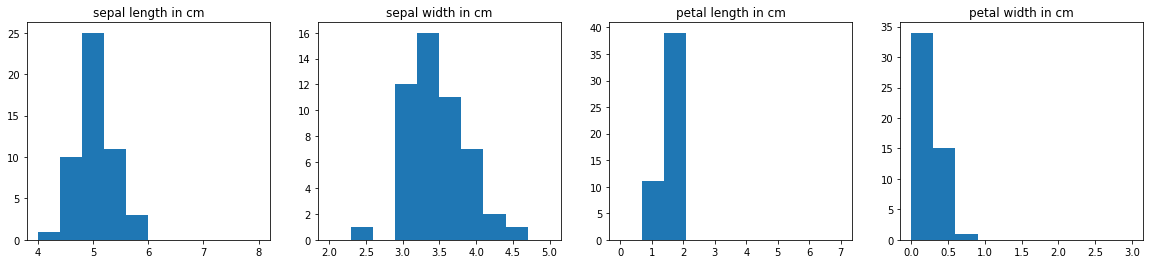

In [25]:
setosa_data = dataset[dataset[4] == 'Iris-setosa']
print("\t\t\tAverage\t\tStd")
for i in range(0,4):
    print(feature_list[i] + "\t" + str(round(setosa_data[i].mean(),3)) + "\t\t" + str(round(setosa_data[i].std(),3)))
print("\n")

plt.figure(figsize=(20, 4))
for i in range(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(setosa_data[i], bins=10, range=[round(dataset[i].min()-0.5), round(dataset[i].max()+0.5)])
    plt.title(feature_list[i])
plt.show()

#### Iris-versicolor
* Use Dataframe.mean() and Dataframe.std() in Pandas to find the average and standard deviation of each feature.
* Use plt.hist() to draw the value frequency fugure.

			Average		Std
sepal length in cm	5.936		0.516
sepal width in cm	2.77		0.314
petal length in cm	4.26		0.47
petal width in cm	1.326		0.198




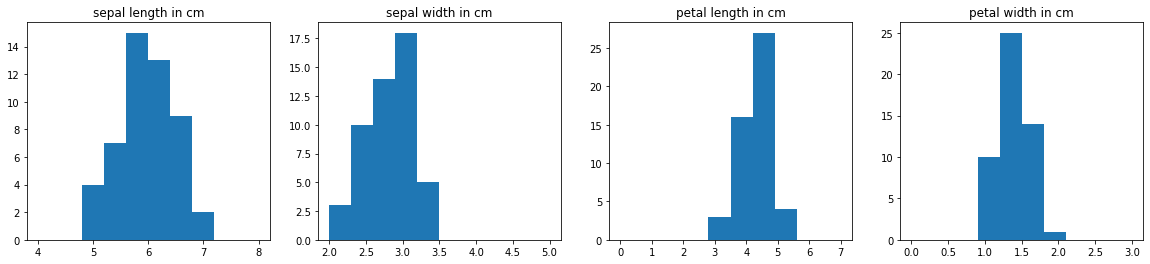

In [26]:
versicolor_data = dataset[dataset[4] == 'Iris-versicolor']
print("\t\t\tAverage\t\tStd")
for i in range(0,4):
    print(feature_list[i] + "\t" + str(round(versicolor_data[i].mean(),3)) + "\t\t" + str(round(versicolor_data[i].std(),3)))
print("\n")

plt.figure(figsize=(20, 4))
for i in range(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(versicolor_data[i], bins=10, range=[round(dataset[i].min()-0.5), round(dataset[i].max()+0.5)])
    plt.title(feature_list[i])
plt.show()

#### Iris-virginica
* Use Dataframe.mean() and Dataframe.std() in Pandas to find the average and standard deviation of each feature.
* Use plt.hist() to draw the value frequency fugure.

			Average		Std
sepal length in cm	6.588		0.636
sepal width in cm	2.974		0.322
petal length in cm	5.552		0.552
petal width in cm	2.026		0.275




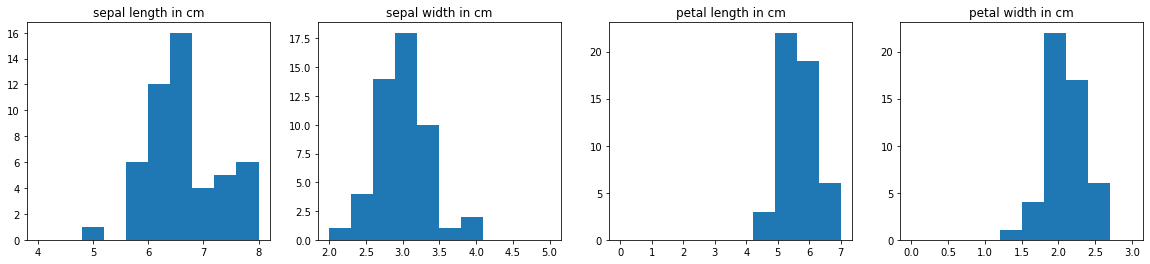

In [27]:
virginica_data = dataset[dataset[4] == 'Iris-virginica']
print("\t\t\tAverage\t\tStd")
for i in range(0,4):
    print(feature_list[i] + "\t" + str(round(virginica_data[i].mean(),3)) + "\t\t" + str(round(virginica_data[i].std(),3)))
print("\n")

plt.figure(figsize=(20, 4))
for i in range(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(virginica_data[i], bins=10, range=[round(dataset[i].min()-0.5), round(dataset[i].max()+0.5)])
    plt.title(feature_list[i])
plt.show()

## 3. Data preprocessing
* Use Dataframe.drop() in Pandas to drop the columns which contains missing values.
* Use LabelEncoder() in scikit-learn to encode the target element in the dataset to fit the model's input.
* Use Dataframe.sample(frac=1) in Pandas to shuffle the data.

In [6]:
# Drop columns with miss value.
dataset.drop(columns=dataset.columns[(dataset == '?').any()], inplace=True)

# Transform data format so your model can process them. (From characters to integers)
labelencoder=LabelEncoder()
dataset[4] = labelencoder.fit_transform(dataset[4])

# Shuffle the data.
processed_data = dataset.sample(frac=1).reset_index(drop=True)
processed_data

,0,1,2,3,4
0,5.2,2.7,3.9,1.4,1
1,5.1,3.8,1.9,0.4,0
2,5.0,2.0,3.5,1.0,1
3,6.7,2.5,5.8,1.8,2
4,5.7,4.4,1.5,0.4,0
...,...,...,...,...,...
145,4.6,3.4,1.4,0.3,0
146,5.1,2.5,3.0,1.1,1
147,5.8,2.6,4.0,1.2,1
148,4.7,3.2,1.3,0.2,0


## 4. Model Construction
#### Holdout validation
* Use GaussianNB() in scikit-learn as the training model for our continuous value dataset.
* Use train_test_split() in scikit-learn to split the dataset into two parts, one for training, one for validation.
* User confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.

In [30]:
# data spliting
hv_x = processed_data.drop([4], axis=1).values
hv_y = processed_data[4].values
hv_x_train, hv_x_test, hv_y_train, hv_y_test = train_test_split(hv_x,hv_y,test_size=0.3)

# model trainging
hv_nb = GaussianNB()
hv_nb.fit(hv_x_train, hv_y_train)

# model testing
hv_y_predict = hv_nb.predict(hv_x_test)

# training result
hv_mat = confusion_matrix(y_true=hv_y_test, y_pred=hv_y_predict)
hv_accuracy = round(accuracy_score(hv_y_test, hv_y_predict)*100, 2)
hv_recall = round(recall_score(hv_y_test, hv_y_predict, average='macro')*100,2)
hv_precision = round(ps(hv_y_test, hv_y_predict, average='macro')*100,2)

#### 3-fold cross-validation
* Use GaussianNB() in scikit-learn as the training model for our continuous value dataset.
* Use KFold() in scikit-learn to split the data into k-fold to do the cross-validation.
* Use confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.
    * Use average='macro' in recall_score() and precision_score() to average all the performance.

In [31]:
cv_x = processed_data.drop([4], axis=1).values
cv_y = processed_data[4].values
cv_k_fold = KFold(n_splits=3)
cv_k_fold.get_n_splits(cv_x)
cv_nb = GaussianNB()

# declare variables that save the performance
cv_accuracy=0.0
cv_recall=0.0
cv_precision=0.0
cv_mat=np.array([[0,0,0],[0,0,0],[0,0,0]])

for train_index, test_index in cv_k_fold.split(cv_x):
    # get data in this epoch
    cv_x_train, cv_x_test = cv_x[train_index], cv_x[test_index]
    cv_y_train, cv_y_test = cv_y[train_index], cv_y[test_index]
    
    # model training
    cv_nb.fit(cv_x_train, cv_y_train)

    # model testing
    cv_y_predict = cv_nb.predict(cv_x_test)

    # training result
    cv_accuracy = cv_accuracy + accuracy_score(cv_y_test, cv_y_predict)*100
    cv_recall = cv_recall + recall_score(cv_y_test, cv_y_predict, average='macro')*100
    cv_precision = cv_precision + ps(cv_y_test, cv_y_predict, average='macro')*100
    cv_mat = cv_mat + confusion_matrix(y_true=cv_y_test, y_pred=cv_y_predict)

# averaging result
cv_mat = (cv_mat/3).astype(int)
cv_accuracy = round(cv_accuracy / 3, 2)
cv_recall = round(cv_recall / 3, 2)
cv_precision = round(cv_precision / 3, 2)

## 6. Results
* Use ConfusionMatrixDisplay() in scikit-learn to plot the confusion matrix of validation result for each model.
* Use plt.subplots() in matplotlib to combine all the figures as one big figure.

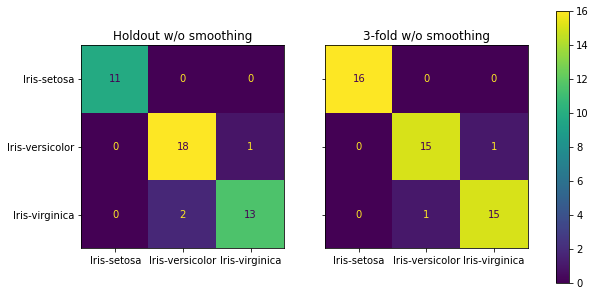


			Accuracy	Sensitivity	Precision
Holdout validation	93.33%		93.8%		94.29%
3-fold validation	94.67%		94.57%		94.94%


In [32]:
label=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')

disp = ConfusionMatrixDisplay(hv_mat, display_labels=label)
disp.plot(ax=axes[0])
disp.ax_.set_title('Holdout w/o smoothing')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')

disp = ConfusionMatrixDisplay(cv_mat, display_labels=label)
disp.plot(ax=axes[1])
disp.ax_.set_title('3-fold w/o smoothing')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')

f.colorbar(disp.im_, ax=axes)
plt.show()

print("\n\t\t\tAccuracy\tSensitivity\tPrecision")
print("Holdout validation\t" + str(hv_accuracy) + "%\t\t" + str(hv_recall) + "%\t\t" + str(hv_precision) + "%")
print("3-fold validation\t" + str(cv_accuracy) + "%\t\t" + str(cv_recall) + "%\t\t" + str(cv_precision) + "%")

## 7. Comparison & Conclusion

* Holdout Validation v.s. K-fold cross-validation
    * We can observe that the the performance of K-fold cross validation with K=3 is higher than the holdout validation model's.
    * I refer that the reason of the observation is that the number of samples is not enough to holdout validation and if we do k-fold cross-validation on the model, we can reduce the problem and make the performance better.

## 8. Questions
#### What are the values of 𝜇 and 𝜎 of assumed 𝑃( 𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ | 𝑌=Iris Versicolour)?
* Use Dataframe.mean() and Dataframe.std() in Pandas to find the average and standard deviation.

#### Use a graph to show the probability density function of assumed 𝑃( 𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ | 𝑌=Iris Versicolour)
* Use stats.norm.pdf() in numpy, average and standard deviation we get above to find the fitted PDF.
* Combine the fitted PDF and the histogram as a figure.

Average: 4.26
Std: 0.47



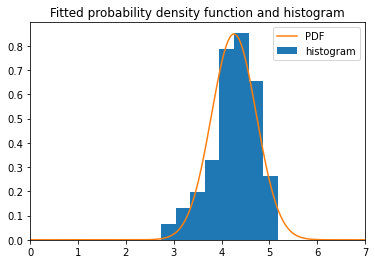

In [123]:
# find the the average and standard deviation
sigma = versicolor_data[2].std()
mu = versicolor_data[2].mean()
print("Average: " + str(mu))
print("Std: " + str(round(sigma,2)) + "\n")

# draw histogram of data
plt.hist(versicolor_data[2], bins='auto', range=[round(dataset[2].min()-0.5), round(dataset[2].max()+0.5)], density=1, label='histogram')

# find fitted PDF of dara
x_axis = np.arange(round(dataset[2].min()-0.5), round(dataset[2].max()+0.5), 0.001)
plt.plot(x_axis, stats.norm.pdf(x_axis,mu,sigma), label='PDF')

# some setting of the figure
plt.xlim(round(dataset[2].min()-0.5), round(dataset[2].max()+0.5))
plt.legend(loc='best')
plt.title('Fitted probability density function and histogram')
plt.show()